### Reload plots for the paper Li, Ruihe, Kirkaldy, Niall D., Oehler, Fabian, Marinescu, Monica, Offer, Gregory J., & O'Kane, Simon E. J. (2025). The importance of degradation mode analysis in parameterizing lifetime prediction models of lithium-ion battery degradation., which will be published soon on Nature Communications. For validation on Exp-1

In [1]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

In [2]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl; import json
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17;

font = {'family' : 'DejaVu Sans',  'size'   : fs}
mpl.rc('font', **font)

In [3]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation",
    "Expt 2,2 - C-based Degradation 2",
    "Expt 3 - Cathode Degradation and Li-Plating",
    "Expt 4 - Drive Cycle Aging (Control)",
    "Expt 5 - Standard Cycle Aging (Control)",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [4]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"Reproduce_Li2024"))
sys.path.append(str_path_1) 
from Fun_NC import * # directly do this for HPC
# Load Niall's data
str_path_2 = os.path.abspath(os.path.join(pb.__path__[0],'..\\..'))
Path_NiallDMA = os.path.abspath(os.path.join(str_path_2,"SimSave\\InputData\\"))
Exp_no = 1
Temp_Cell_Exp1 = Temp_Cell_Exp_All[Exp_no-1] 
Exp_1_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[Exp_no-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[Exp_no-1],
    Exp_no-1)


Finish reading Experiment!


In [5]:
Exp_no = 5
Temp_Cell_Exp5 = Temp_Cell_Exp_All[Exp_no-1] 
Exp_5_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[Exp_no-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[Exp_no-1],
    Exp_no-1)

Finish reading Experiment!


In [6]:
Exp_1_AllData

{'A': {'Extract Data':     Ageing Sets  Ageing Cycles Age set start date Age set end date  \
  0             0              0                NaN              NaN   
  1             1            257         23/07/2020       06/08/2020   
  2             2            514         10/08/2020       24/08/2020   
  3             3            771         02/09/2020       16/09/2020   
  4             4           1028         23/09/2020       08/10/2020   
  5             5           1285         13/10/2020       28/10/2020   
  6             6           1542         04/11/2020       18/11/2020   
  7             7           1799         24/11/2020       09/12/2020   
  8             8           2056         16/12/2020       31/12/2020   
  9             9           2313         11/01/2021       25/01/2021   
  10           10           2570         01/02/2021       17/02/2021   
  11           11           2827         01/03/2021       12/03/2021   
  12           12           3084         17

In [7]:
import pickle
def Read_Model_BestFit(Path_to_Results, purpose_i, Pick, Re_No):
    purpose = f"{purpose_i}_Case_{Pick}_{Pick}"
    path_i = os.path.join(
        Path_to_Results,  purpose, "Mats", 
        f"{Pick}_Re_{Re_No}-midc_merge.pkl")
    #print(path_i)
    with open(path_i, 'rb') as file:
        data = pickle.load(file)
    return data

""" with open('bayes_opt_state.pkl', 'rb') as f:
    optimizer = pickle.load(f) """

BasicPath = os.path.join(
    os.path.abspath(os.path.join(pb.__path__[0],'..\\..')), 
    'SimSave', 'Li2024_Results', 'Save_LongRun')
purpose_i = "SEI_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")

SEI_Exp1_GoodFit = {}
SEI_Exp1_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)

In [8]:
# read modelling results for exp-5
SEI_Exp5_GoodFit = {}; purpose_i = "SEI_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")
SEI_Exp5_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)
SEIDry_Exp5_GoodFit = {}; purpose_i = "SEI_Dry_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")
SEIDry_Exp5_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)
Full_Exp5_GoodFit = {}; purpose_i = "Full_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")
Full_Exp5_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)

In [9]:
purpose_i = "SEI_Dry_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")

SEIDry_Exp1_GoodFit = {}
SEIDry_Exp1_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)

In [10]:
purpose_i = "Full_Exp1235_NC"
Path_to_Results = os.path.join(BasicPath, purpose_i, "Results")

Full_Exp1_GoodFit = {}
Full_Exp1_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=3, Re_No=0)

In [11]:
SaveFig_Path = os.path.join(
    os.path.abspath(os.path.join(pb.__path__[0],'..\\..')), 
    'SimSave', 'Li2024_Results', 'SaveFig')
Target = "R_241208_Exp1_5"
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

In [12]:
fs=7
font = {'family' : 'Arial',  'size'   : fs}
mpl.rc('font', **font)
colors = [
    (106, 61, 154, 1),        # 紫色
    (230, 159, 0, 1),        # 橙色
    (86, 180, 233, 1),       # 天蓝色
    (213, 94, 0, 1),         # 红色
]
cm_4s = [(r/255, g/255, b/255, d) for r, g, b, d in colors]
ps_num = 40; index_exp=1;  T_deg = 25; dpi = 300; ms = 3

C:\Users\lrhkm\AppData\Local\Temp\ipykernel_27940\253051886.py:225: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[-1].legend(


Supplementary Figure 7 saved to d:\lrhwork\model_rh\env_pbgem_nc\SimSave\Li2024_Results\SaveFig\R_241208_Exp1_5\Supplementary Figure 7.xlsx


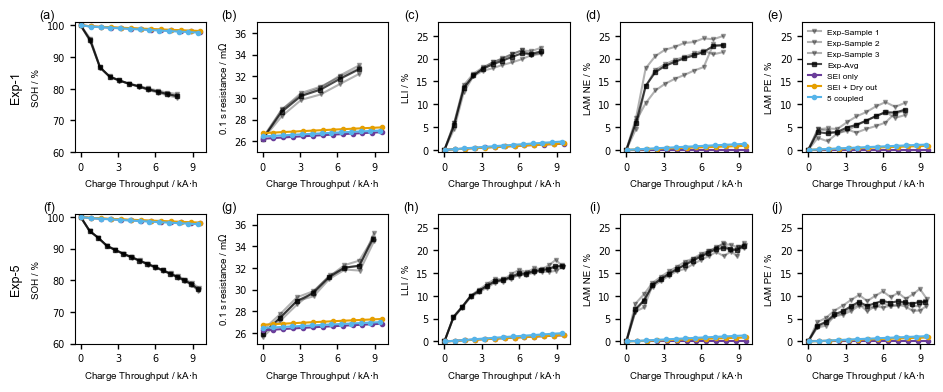

In [25]:
# Supplementary Figure 7 Model validation against “Experiment 1” 
#       and “Experiment 5”at 40°C. 
# All three model fail to predict both experiments.
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
Exp_Any_AllData = Exp_1_AllData; 
index_exp = 1
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
Cases = [SEI_Exp1_GoodFit,SEIDry_Exp1_GoodFit,Full_Exp1_GoodFit]; 

# 定义Excel文件路径
excel_file_path = os.path.join(target_folder, "Supplementary Figure 7.xlsx")
data_for_excel = {}

fig, Axs = plt.subplots(2,5, figsize=(24/2.54, 10/2.54),tight_layout=True)
axs = Axs.flatten()
j=0
# 保存fig(a)数据
dict_fig_a = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,
            markersize = ms) # label=f"Cell {cell}" 
        dict_fig_a[f'Charge_Throughput_Exp1_exp_{cell} (kA.h)'] = chThr_temp
        dict_fig_a[f'SoH_Exp1_exp_{cell} (%)'] = np.array(df_DMA["SoH"]) * 100
    axs[j].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",
        markersize = ms) 
    dict_fig_a['Charge_Throughput_Exp1_avg (kA.h)'] = X_1_st
    dict_fig_a['SoH_Exp1_avg (%)'] = Y_1_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend SOH [%]'], 
            marker='o', markersize = ms,
            color = cm_4s[k], label=Str_cases[k])
        dict_fig_a[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]['Throughput capacity [kA.h]']
        dict_fig_a[f'SoH_{Str_cases[k]} (%)'] = case[str(T_deg)][0]['CDend SOH [%]']
    axs[j].set_ylim(60,101)
    axs[j].set_xticks([0,3,6,9])
    #axs[j].set_yticks([88,92,96,100])
df_fig_a = pd.DataFrame.from_dict(dict_fig_a, orient='index').T
data_for_excel['fig(a)'] = df_fig_a

axs[0].set_ylabel("SOH / %")


j = 1
# 保存fig(b)数据
dict_fig_b = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[j].plot(
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp,
            markersize = ms,)
        dict_fig_b[f'Charge_Throughput_Exp1_exp_{cell} (kA.h)'] = np.array(df["Charge Throughput (A.h)"][index_Res])/1e3
        dict_fig_b[f'0.1s_Resistance_Exp1_exp_{cell} (mOhms)'] = np.array(df["0.1s Resistance (Ohms)"][index_Res]) * 1e3
    axs[j].plot(
        X_5_st,Y_5_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",
        markersize = ms) 
    dict_fig_b['Charge_Throughput_Exp1_avg (kA.h)'] = X_5_st
    dict_fig_b['0.1s_Resistance_Exp1_avg (mOhms)'] = Y_5_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["Res_midSOC"]), 
            marker='o', markersize = ms, 
            color = cm_4s[k], label=Str_cases[k])
        dict_fig_b[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]["Throughput capacity [kA.h]"]
        dict_fig_b[f'Res_midSOC_{Str_cases[k]} (mOhms)'] = np.array(case[str(T_deg)][0]["Res_midSOC"])
    
    axs[j].set_ylim(25,37)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel(r"0.1 s resistance / m$\Omega$")
df_fig_b = pd.DataFrame.from_dict(dict_fig_b, orient='index').T
data_for_excel['fig(b)'] = df_fig_b

j=2
# 保存fig(c)数据
dict_fig_c = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,
            markersize = ms, ) # label=f"Cell {cell}"
        dict_fig_c[f'Charge_Throughput_Exp1_exp_{cell} (kA.h)'] = chThr_temp
        dict_fig_c[f'LLI_Exp1_exp_{cell} (%)'] = np.array(df_DMA["LLI"]) * 100 
    axs[j].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",
        markersize = ms) 
    dict_fig_c['Charge_Throughput_Exp1_avg (kA.h)'] = X_1_st
    dict_fig_c['LLI_Exp1_avg (%)'] = Y_2_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend LLI [%]'], 
            marker='o', markersize = ms, 
            color = cm_4s[k], label=Str_cases[k])
        dict_fig_c[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]['Throughput capacity [kA.h]']
        dict_fig_c[f'LLI_{Str_cases[k]} (%)'] = case[str(T_deg)][0]['CDend LLI [%]']
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LLI / %")
df_fig_c = pd.DataFrame.from_dict(dict_fig_c, orient='index').T
data_for_excel['fig(c)'] = df_fig_c

j = 3
# 保存fig(d)数据
dict_fig_d = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp, np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp,
            markersize = ms,  )
        dict_fig_d[f'Charge_Throughput_Exp1_exp_{cell} (kA.h)'] = chThr_temp
        dict_fig_d[f'LAM_NE_tot_Exp1_exp_{cell} (%)'] = np.array(df_DMA["LAM NE_tot"]) * 100
    axs[j].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",
        markersize = ms,  ) 
    dict_fig_d['Charge_Throughput_Exp1_avg (kA.h)'] = X_1_st
    dict_fig_d['LAM_NE_tot_Exp1_avg (%)'] = Y_3_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_ne [%]"]), 
            marker='o', markersize = ms,  
            color = cm_4s[k], label=Str_cases[k])
        dict_fig_d[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]["Throughput capacity [kA.h]"]
        dict_fig_d[f'LAM_NE_tot_{Str_cases[k]} (%)'] = np.array(case[str(T_deg)][0]["CDend LAM_ne [%]"])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LAM NE / %")
df_fig_d = pd.DataFrame.from_dict(dict_fig_d, orient='index').T
data_for_excel['fig(d)'] = df_fig_d

j = 4
# 保存fig(e)数据
dict_fig_e = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for m, cell in enumerate(Exp_temp_i_cell):
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp, np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,
            markersize = ms, label=f"Exp-Sample {m+1}" )
        dict_fig_e[f'Charge_Throughput_Exp1_exp_{cell} (kA.h)'] = chThr_temp
        dict_fig_e[f'LAM_PE_Exp1_exp_{cell} (%)'] = np.array(df_DMA["LAM PE"]) * 100
    axs[j].plot(
        X_1_st,Y_4_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",
        markersize = ms, ) 
    dict_fig_e['Charge_Throughput_Exp1_avg (kA.h)'] = X_1_st
    dict_fig_e['LAM_PE_Exp1_avg (%)'] = Y_4_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_pe [%]"]), 
            marker='o', markersize = ms,   
            color = cm_4s[k], label=Str_cases[k])
        dict_fig_e[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]["Throughput capacity [kA.h]"]
        dict_fig_e[f'LAM_PE_{Str_cases[k]} (%)'] = np.array(case[str(T_deg)][0]["CDend LAM_pe [%]"])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LAM PE / %")
df_fig_e = pd.DataFrame.from_dict(dict_fig_e, orient='index').T
data_for_excel['fig(e)'] = df_fig_e

ABC_labels = [f"({chr(97 + i)})" for i in range(10)]
for k in range(5):
    axs[k].set_xlabel(r"Charge Throughput / kA$\cdot$h")
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
    axs[k].text(
        -0.15, 1.1, 
        ABC_labels[k], transform=axs[k].transAxes, 
        fontsize=fs+2,  # fontweight='bold', 
        va='top', ha='right')
axs[-1].legend(
    prop={'size':fs-1},loc='best',frameon=False,
    ncol=1, markerscale=1, borderpad=0.2,
    handlelength=1.5,columnspacing=1)

""" plt.savefig(
    target_folder + f"/Exp-1 Fit 5 indices.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Exp-1 Fit 5 indices.svg")  """


###########################################################################
###########################################################################
###########################################################################
###########################################################################
###########################################################################
# for exp-5
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
Exp_Any_AllData = Exp_5_AllData; 
index_exp = 5
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
Cases = [SEI_Exp1_GoodFit,SEIDry_Exp1_GoodFit,Full_Exp1_GoodFit]; 

#fig, axs = plt.subplots(1,5, figsize=(25,5),tight_layout=True) 
j=0+5
# 保存fig(f)数据
dict_fig_f = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,
            markersize = ms,) # label=f"Cell {cell}" 
        dict_fig_f[f'Charge_Throughput_Exp5_exp_{cell} (kA.h)'] = chThr_temp
        dict_fig_f[f'SoH_Exp5_exp_{cell} (%)'] = np.array(df_DMA["SoH"]) * 100
    axs[j].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",
        markersize = ms,) 
    dict_fig_f['Charge_Throughput_Exp5_avg (kA.h)'] = X_1_st
    dict_fig_f['SoH_Exp5_avg (%)'] = Y_1_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend SOH [%]'], 
            markersize = ms, marker='o', 
            color = cm_4s[k], label=Str_cases[k])
        dict_fig_f[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]['Throughput capacity [kA.h]']
        dict_fig_f[f'SoH_{Str_cases[k]} (%)'] = case[str(T_deg)][0]['CDend SOH [%]']
    axs[j].set_ylim(60,101)
    axs[j].set_xticks([0,3,6,9])
    #axs[j].set_yticks([88,92,96,100])
    
axs[j].set_ylabel("SOH / %")
df_fig_f = pd.DataFrame.from_dict(dict_fig_f, orient='index').T
data_for_excel['fig(f)'] = df_fig_f

j = 1+5
# 保存fig(g)数据
dict_fig_g = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[j].plot(
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp,
            markersize = ms,)
        dict_fig_g[f'Charge_Throughput_Exp5_exp_{cell} (kA.h)'] = np.array(df["Charge Throughput (A.h)"][index_Res])/1e3
        dict_fig_g[f'0.1s_Resistance_Exp5_exp_{cell} (mOhms)'] = np.array(df["0.1s Resistance (Ohms)"][index_Res]) * 1e3
    axs[j].plot(
        X_5_st,Y_5_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",
        markersize = ms,) 
    dict_fig_g['Charge_Throughput_Exp5_avg (kA.h)'] = X_5_st
    dict_fig_g['0.1s_Resistance_Exp5_avg (mOhms)'] = Y_5_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["Res_midSOC"]), 
            markersize = ms,
            marker='o', color = cm_4s[k], label=Str_cases[k])
        dict_fig_g[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]["Throughput capacity [kA.h]"]
        dict_fig_g[f'Res_midSOC_{Str_cases[k]} (mOhms)'] = np.array(case[str(T_deg)][0]["Res_midSOC"])
    
    axs[j].set_ylim(25,37)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel(r"0.1 s resistance / m$\Omega$")
df_fig_g = pd.DataFrame.from_dict(dict_fig_g, orient='index').T
data_for_excel['fig(g)'] = df_fig_g

j=2+5
# 保存fig(h)数据
dict_fig_h = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,
            markersize = ms,) # label=f"Cell {cell}" 
        dict_fig_h[f'Charge_Throughput_Exp5_exp_{cell} (kA.h)'] = chThr_temp
        dict_fig_h[f'LLI_Exp5_exp_{cell} (%)'] = np.array(df_DMA["LLI"]) * 100
    axs[j].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",
        markersize = ms,) 
    dict_fig_h['Charge_Throughput_Exp5_avg (kA.h)'] = X_1_st
    dict_fig_h['LLI_Exp5_avg (%)'] = Y_2_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend LLI [%]'],
            markersize = ms, 
            marker='o', color = cm_4s[k], label=Str_cases[k])
        dict_fig_h[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]['Throughput capacity [kA.h]']
        dict_fig_h[f'LLI_{Str_cases[k]} (%)'] = case[str(T_deg)][0]['CDend LLI [%]']
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LLI / %")
df_fig_h = pd.DataFrame.from_dict(dict_fig_h, orient='index').T
data_for_excel['fig(h)'] = df_fig_h

j = 3+5
dict_fig_i = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp, np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp,markersize = ms,)
        dict_fig_i[f'Charge_Throughput_Exp5_exp_{cell} (kA.h)'] = chThr_temp
        dict_fig_i[f'LAM_NE_tot_Exp5_exp_{cell} (%)'] = np.array(df_DMA["LAM NE_tot"]) * 100
    axs[j].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg",markersize = ms,) 
    dict_fig_i['Charge_Throughput_Exp5_avg (kA.h)'] = X_1_st
    dict_fig_i['LAM_NE_tot_Exp5_avg (%)'] = Y_3_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_ne [%]"]), 
            markersize = ms,
            marker='o', color = cm_4s[k], label=Str_cases[k])
        dict_fig_i[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]["Throughput capacity [kA.h]"]
        dict_fig_i[f'LAM_NE_tot_{Str_cases[k]} (%)'] = np.array(case[str(T_deg)][0]["CDend LAM_ne [%]"])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LAM NE / %")
df_fig_i = pd.DataFrame.from_dict(dict_fig_i, orient='index').T
data_for_excel['fig(i)'] = df_fig_i

j = 4+5
dict_fig_j = {}
for i,T_deg in enumerate([40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for m,cell in enumerate(Exp_temp_i_cell):
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j].plot(
            chThr_temp, np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,
            markersize = ms, label=f"Exp-Sample {m+1}")
        dict_fig_j[f'Charge_Throughput_Exp5_exp_{cell} (kA.h)'] = chThr_temp
        dict_fig_j[f'LAM_PE_Exp5_exp_{cell} (%)'] = np.array(df_DMA["LAM PE"]) * 100
    axs[j].plot(
        X_1_st,Y_4_st_avg,color=color_exp_Avg,
        markersize = ms,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    dict_fig_j['Charge_Throughput_Exp5_avg (kA.h)'] = X_1_st
    dict_fig_j['LAM_PE_Exp5_avg (%)'] = Y_4_st_avg
    for k,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_pe [%]"]), 
            markersize = ms, marker='o', 
            color = cm_4s[k], label=Str_cases[k])
        dict_fig_j[f'Throughput_capacity_{Str_cases[k]} (kA.h)'] = case[str(T_deg)][0]["Throughput capacity [kA.h]"]
        dict_fig_j[f'LAM_PE_{Str_cases[k]} (%)'] = np.array(case[str(T_deg)][0]["CDend LAM_pe [%]"])
    axs[j].set_ylim(-0.5,28)
    axs[j].set_xticks([0,3,6,9]);
axs[j].set_ylabel("LAM PE / %")
df_fig_j = pd.DataFrame.from_dict(dict_fig_j, orient='index').T
data_for_excel['fig(j)'] = df_fig_j

for k in range(5):
    k = k+5
    axs[k].set_xlabel(r"Charge Throughput / kA$\cdot$h")
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
    axs[k].text(
        -0.15, 1.1, 
        ABC_labels[k], transform=axs[k].transAxes, 
        fontsize=fs+2,  # fontweight='bold', 
        va='top', ha='right')
axs[4].legend(
    prop={'size':fs-1},loc='best',frameon=False,
    ncol=1, markerscale=1, borderpad=0.2,
    handlelength=1.5,columnspacing=1)
axs[0].text(-0.4, 0.5, "Exp-1", 
    verticalalignment='center', 
    horizontalalignment='right', 
    rotation='vertical', 
    transform=axs[0].transAxes,
    fontsize=fs+2)
axs[5].text(-0.4, 0.5, "Exp-5", 
    verticalalignment='center', 
    horizontalalignment='right', 
    rotation='vertical', 
    transform=axs[5].transAxes,
    fontsize=fs+2)
""" axs[-1].legend(
    prop={'size':fs-1},loc='best',frameon=False,
    ncol=1, markerscale=1, borderpad=0.2,
    handlelength=1.5,columnspacing=1) """
plt.savefig(
    target_folder + f"/Supplementary Figure 7 Validation against Exp-1 and 5 Fit 5 indices.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Supplementary Figure 7 Validation against Exp-1 and 5 Fit 5 indices.svg") 


# 保存到Excel文件
with pd.ExcelWriter(excel_file_path) as writer:
    for sheet_name, data in data_for_excel.items():
        df = pd.DataFrame(data)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Supplementary Figure 7 saved to {excel_file_path}")